# Machine learning on network analysis

Hopefully all dataset is available to be used for free/education.

All data used is a subset of the original data, converted from it's respective file type to csv for ease of use.


In [181]:
%config IPCompleter.greedy=True

In [182]:
import glob
import random

import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

from sklearn.preprocessing import LabelBinarizer

In [183]:
datasets_location = r"./Datasets"

gt_dataset_location = datasets_location + r"/GT-malware-netflow-daily-feed-2019"
website_dataset_location = datasets_location + r"/Malicious-and-benign-websites"
network_dataset_location = datasets_location + r"/Computer-network-traffic"
aws_dataset_location = datasets_location + r"/AWS-cyber-defence"

## 1. GT Malware netflow

Original data: https://www.impactcybertrust.org/dataset_view?idDataset=1143

Each .npcapd file is converted to a csv file with it's original md5 hash name. A random subset of those files were taken for analysis thus data may be misleading/missing.

The headings are confusing when converted to a csv file. I do not understand what most of it means however looking at the data, it seems that they all seem to have values of 0s.

Predicted headers:  
ts: time start  
te: time end  
td: time duration  
sa: source address  
da: destination address  
sp: source port  
dp: destination port  
pr: protocol  
flg: ???  
fwd: ???  
...: ???  

### Conclusion of dataset (incomplete)
This dataset will have to be unsupervised learning.

Possible suggestions of future work
1. Compare daily network flow versus other days (given that there are files for that, this one is just for one day).
2. Understand "normal" traffic for protocols (I have no expertise in this)
3. Visualise flow of network
4. Take data visualisation course in semester 2
5. If malware detected, what type? Maybe build NN around it.
6. ...

In [184]:
gt_files = glob.glob(gt_dataset_location + r"./*.csv")
print("\n".join(gt_files[:5])) # example of files

./Datasets/GT-malware-netflow-daily-feed-2019.\00316e3146dfdd94e3de8db5cff02358.csv
./Datasets/GT-malware-netflow-daily-feed-2019.\0063580496a346b26045bf912a3357f6.csv
./Datasets/GT-malware-netflow-daily-feed-2019.\007c324cad20bd173ab5b5ea2767187b.csv
./Datasets/GT-malware-netflow-daily-feed-2019.\00c3f91c57707c903207bab8c0db1955.csv
./Datasets/GT-malware-netflow-daily-feed-2019.\00d5bb860674522d17f98a941f8690f3.csv


In [185]:
# random chosen file = 511dc8b67e6d14ba6abaaacf971651da
pd.read_csv(gt_dataset_location + "/511dc8b67e6d14ba6abaaacf971651da.csv")

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2019-01-19 16:40:44,2019-01-19 16:40:44,0.000,10.0.69.10,224.0.0.22,0,0.0,IGMP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
1,2019-01-19 16:40:45,2019-01-19 16:40:45,0.000,10.0.69.10,224.0.0.22,0,0.0,IGMP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
2,2019-01-19 16:40:49,2019-01-19 16:40:49,0.000,10.0.69.10,143.215.130.30,1032,53.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
3,2019-01-19 16:40:49,2019-01-19 16:40:49,0.000,143.215.130.30,10.0.69.10,53,1032.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
4,2019-01-19 16:40:30,2019-01-19 16:40:30,0.003,0.0.0.0,255.255.255.255,68,67.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
5,2019-01-19 16:40:30,2019-01-19 16:40:40,10.348,10.0.69.1,10.0.69.10,67,68.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
6,2019-01-19 16:40:40,2019-01-19 16:40:40,0.000,10.0.69.10,10.0.69.1,68,67.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.000,0.000,0.000,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
7,2019-01-19 16:40:49,2019-01-19 16:40:49,0.004,10.0.69.10,23.219.217.31,1033,80.0,TCP,.A..SF,0.0,...,0-0-0,0-0-0,0-0-0,0.308,1.765,2.382,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
8,2019-01-19 16:45:50,2019-01-19 16:45:50,0.004,10.0.69.10,23.219.217.31,1035,80.0,TCP,.A..SF,0.0,...,0-0-0,0-0-0,0-0-0,0.292,1.828,1.969,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
9,2019-01-19 16:40:49,2019-01-19 16:40:49,0.003,23.219.217.31,10.0.69.10,80,1033.0,TCP,.A..SF,0.0,...,0-0-0,0-0-0,0-0-0,0.308,1.765,2.382,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000


NFDump results of the same example dataset **(511dc8b67e6d14ba6abaaacf971651da)** vs csv output.  
![alt text](https://i.ibb.co/5syNQt1/gt-nfdump.png "NFDump result of sample dataset")

In [204]:
# Random subset of the files
random.shuffle(gt_files)

n = 500

gt_dfs = []

for _n in range(n):
    gt_df = pd.read_csv(gt_files[_n])
    gt_df_index = gt_df[gt_df['ts'] == 'Summary'].index[0]
    gt_df = gt_df[0:gt_df_index]
    
    gt_dfs.append(gt_df)

concat_gt_df = pd.concat(gt_dfs, ignore_index=True).sort_values(by=['ts'])
concat_gt_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
42,2019-01-19 16:38:15,2019-01-19 16:38:15,0.004,0.0.0.0,255.255.255.255,68,67.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
43,2019-01-19 16:38:15,2019-01-19 16:38:24,8.436,10.1.155.1,10.1.155.10,67,68.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
21692,2019-01-19 16:38:17,2019-01-19 16:38:25,8.283,10.0.29.1,10.0.29.10,67,68.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
35025,2019-01-19 16:38:17,2019-01-19 16:38:17,0.001,0.0.0.0,255.255.255.255,68,67.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000
21691,2019-01-19 16:38:17,2019-01-19 16:38:17,0.004,0.0.0.0,255.255.255.255,68,67.0,UDP,......,0.0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1970-01-01 00:00:00.000


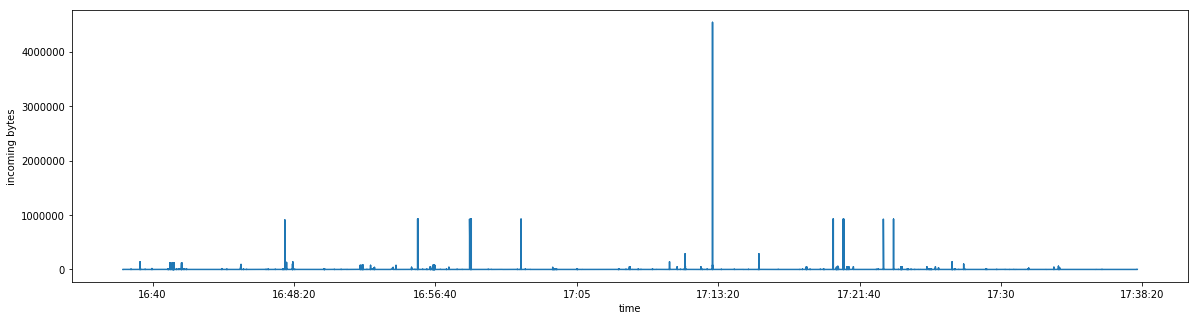

In [205]:
# Incoming bytes based on unprocessed time. Data is not summed.
x = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S').time() for d in concat_gt_df['ts']]

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(x, concat_gt_df['ibyt'])

plt.ylabel('incoming bytes')
plt.show()

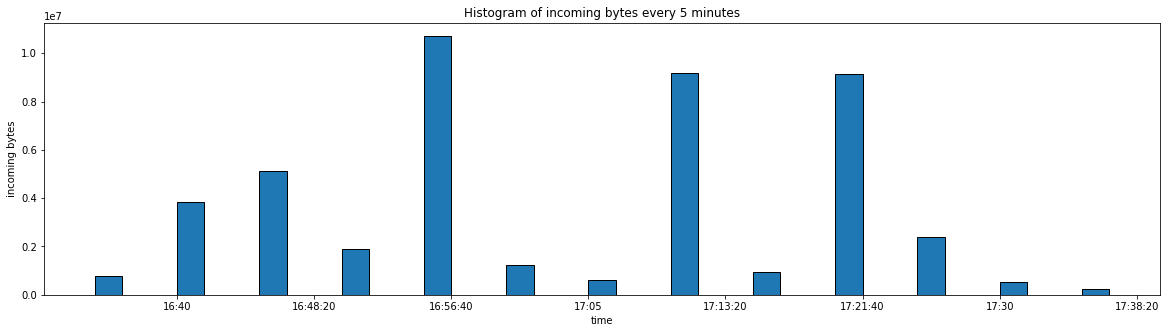

In [206]:
# Incoming bytes data summed every 5 minutes.
# TODO the space between bars should be removed...
df = concat_gt_df[['ts', 'ibyt']].copy()

df['ts'] = pd.to_datetime(df.ts)
df = df.groupby(pd.Grouper(key='ts', freq='5min')).sum().reset_index()
df['ts_time'] = df['ts'].dt.time

# print(df)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.bar(df.ts_time.values, df.ibyt, width=100, 
       edgecolor='black', align='edge')

plt.title('Histogram of incoming bytes every 5 minutes')
plt.ylabel('incoming bytes')
plt.show()

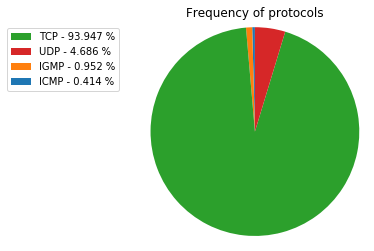

In [189]:
# Pie chart of protocols used
protocols = concat_gt_df.groupby(['pr']).size().reset_index(name='count')

protocols['count_norm'] = [float(i)/sum(protocols['count']) 
                           for i in protocols['count']]

pr_x = protocols['pr']
pr_y = protocols['count']
percent = 100.* pr_y / pr_y.sum()

patches, texts = plt.pie(pr_y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.3f} %'.format(i,j) for i,j in zip(pr_x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, protocols['count']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', 
           bbox_to_anchor=(-0.1, 1.), fontsize=10)
plt.title('Frequency of protocols')
plt.show()

## 2. Malicious and benign websites

Original data: https://www.kaggle.com/crawford/computer-network-traffic

This data set is quite small, only having 4 features therefore I just used all the dataset rather than a subset.  
Unsupervised learning to detect whether a host had been compromised.

### Conclusion of dataset (incomplete)
Possible suggestions of future work

This is quite a small dataset, and just by looking at the graph below, it shows that the purple node spikes quite hard in number of flows. Possible to create a labelled dataset by detecting where compromise starts, and then create a NN.

In [190]:
network_file = glob.glob(network_dataset_location + r"./*.csv")
assert len(network_file) == 1

network_df = pd.read_csv(network_file[0])
network_df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


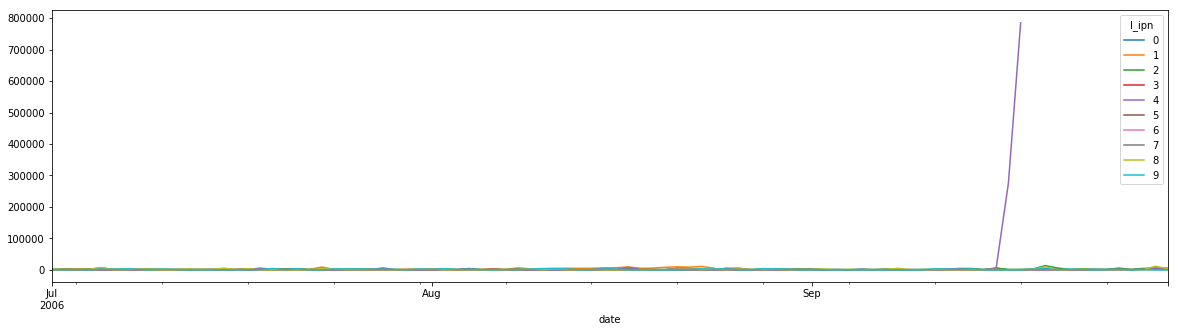

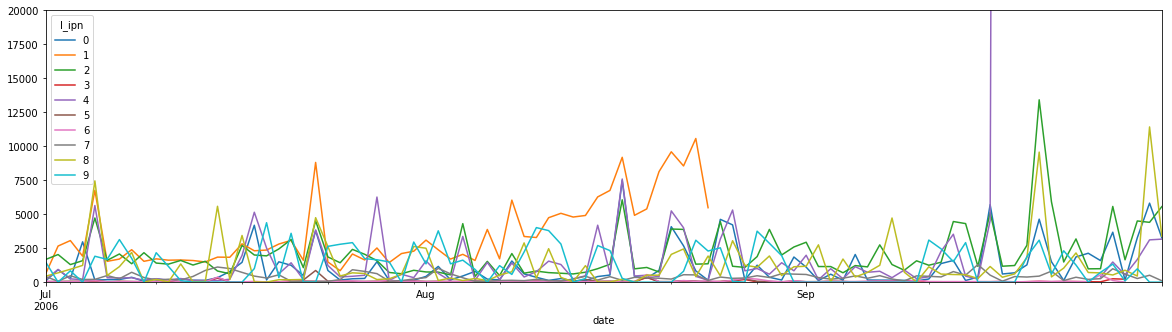

In [191]:
# Number of flows per node per day
network_sum_df = network_df.groupby(['date','l_ipn']).agg({'f': 'sum'}).reset_index()
network_sum_df["date"] = pd.to_datetime(network_sum_df["date"])
ax = network_sum_df.pivot(index="date", columns="l_ipn", values="f")

ax.plot(figsize=(20, 5))
ax.plot(ylim=(0, 20000), figsize=(20, 5))  # limit y axis

## 3. Malicious and benign websites

Original data: https://www.kaggle.com/xwolf12/malicious-and-benign-websites

This dataset is a bit different to the actual thesis idea however it was still security related.

It is already labelled.




### Conclusion of dataset (incomplete)
Possible suggestions of future work

Different supervised machine learning techniques could be applied and compared to each other. Such as NNs vs random forest to compare accuracy and and it's explanations.   
Detect correlation between malicious sites vs benign

In [192]:
website_file = glob.glob(website_dataset_location + r"./*.csv")
assert len(website_file) == 1

website_df = pd.read_csv(website_file[0])
website_df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [193]:
# Numerical attributes split from categorical. 
# If data set is chosen, categorical attributes may provide more insight.
categorical_columns = ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
                       'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']  # are dates numerical or categorical hmm...

numerical_website_df = website_df.drop(categorical_columns, axis=1)
print("Numerical website dataframe columns: %s" % list(numerical_website_df))

Numerical website dataframe columns: ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']


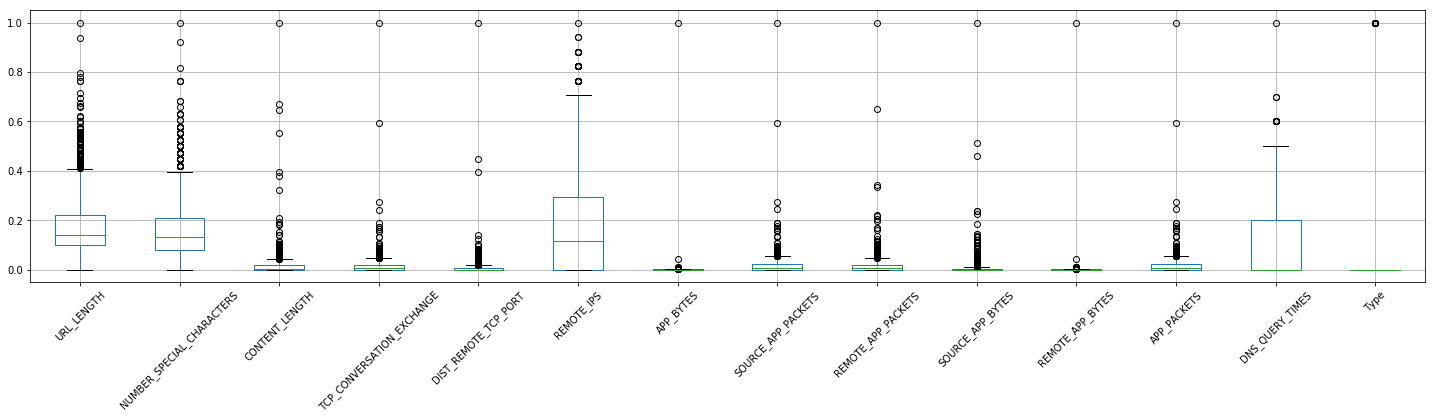

In [194]:
# Box plots of all numerical attributes
from sklearn import preprocessing

# normalise dataset
numerical_website_values = numerical_website_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
numerical_website_values_scaled = min_max_scaler.fit_transform(numerical_website_values)
num_scaled_website_df = pd.DataFrame(numerical_website_values_scaled, 
                                     columns=list(numerical_website_df))

num_scaled_website_df.boxplot(column=list(num_scaled_website_df), figsize=(25, 5), rot=45)

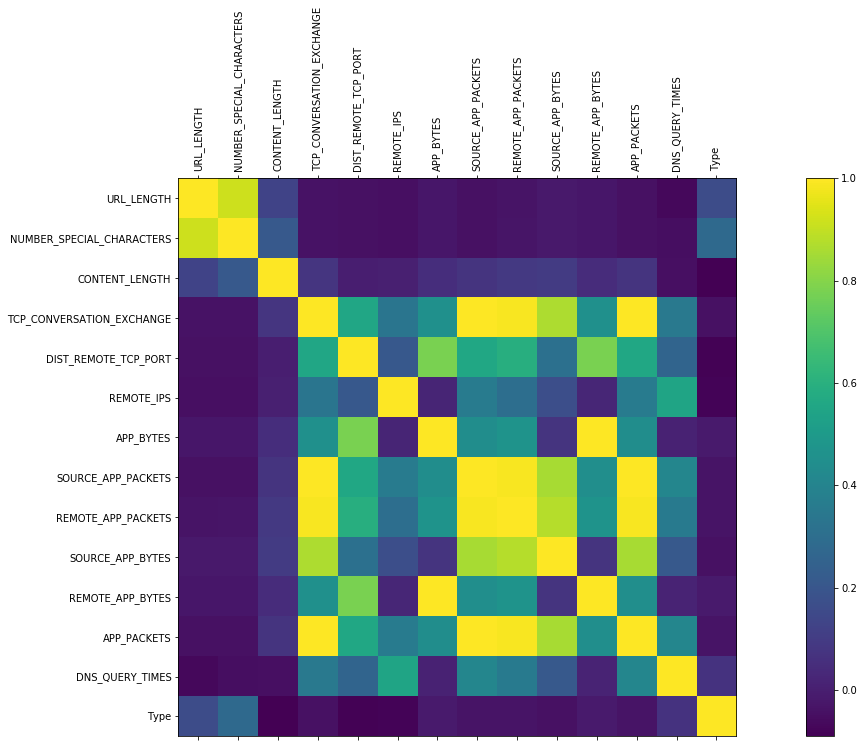

In [195]:
# Correlation heatmap of all numerical attributes
f = plt.figure(figsize=(25, 10))
plt.matshow(num_scaled_website_df.corr(), fignum=f.number)

plt.xticks(range(num_scaled_website_df.shape[1]), 
           num_scaled_website_df.columns, 
           fontsize=10, 
           rotation=90)

plt.yticks(range(num_scaled_website_df.shape[1]), 
           num_scaled_website_df.columns, 
           fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

## 4. AWS Cyber defence 

original data: https://registry.opendata.aws/cse-cic-ids2018/

This data set is absolutely massive. When originally downloading it was 220gb, thankfully they had already prepared csv files which you could specify to download (~7gb).

This dataset is labelled and even specifies what kind of malware. 

I will be using a subset of one csv, which means it will only be looking at one type of malware. It is far too big to load them all for a prototype visualisation.

### Conclusion of dataset (incomplete)
Possible suggestions of future work

Again many different supervised machine learning methods.  
Maybe even apply on a real time network to detect malware, such as DoS.

In [196]:
aws_file = glob.glob(aws_dataset_location + r"./*.csv")

aws_df = pd.read_csv(aws_file[0], nrows=2000)
aws_df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [207]:
# One hot encode labels column
lb = LabelBinarizer()

one_aws_label_df = pd.DataFrame(lb.fit_transform(aws_df['Label']), 
                                columns=['OHE_Label'])
aws_df = pd.concat([aws_df, one_aws_label_df], axis=1)
aws_df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,OHE_Label,OHE_Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0,0
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0,0
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0,0
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0,0
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0,0


In [208]:
corre = aws_df.corr()  # find correlation matrix
corre.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,OHE_Label,OHE_Label
Dst Port,1.000000,-0.063450,-0.284379,-0.081451,-0.083524,-0.070156,-0.049516,-0.257031,-0.055306,-0.215120,...,-0.081322,-0.078265,-0.092318,-0.057395,-0.221207,-0.058116,-0.217562,-0.216507,-0.035058,-0.035058
Protocol,-0.063450,1.000000,-0.084743,0.015905,0.141544,0.109875,0.185389,0.013392,0.595376,0.077609,...,-0.291728,-0.238905,-0.284718,-0.221320,-0.013375,-0.110527,-0.028758,-0.006291,-0.097617,-0.097617
Flow Duration,-0.284379,-0.084743,1.000000,0.315656,0.303747,0.229614,0.169884,0.393061,-0.034976,0.123063,...,0.266081,0.254538,0.305815,0.189283,0.719559,0.320145,0.733930,0.684978,-0.414552,-0.414552
Tot Fwd Pkts,-0.081451,0.015905,0.315656,1.000000,0.905303,0.743209,0.437745,0.149719,-0.011823,0.018750,...,0.140745,0.164721,0.190413,0.088737,0.065851,0.086653,0.072977,0.053469,-0.130958,-0.130958
Tot Bwd Pkts,-0.083524,0.141544,0.303747,0.905303,1.000000,0.796376,0.745803,0.247082,0.001876,0.087191,...,0.032133,0.084735,0.096185,0.003867,0.103524,0.065343,0.105327,0.092135,-0.120691,-0.120691


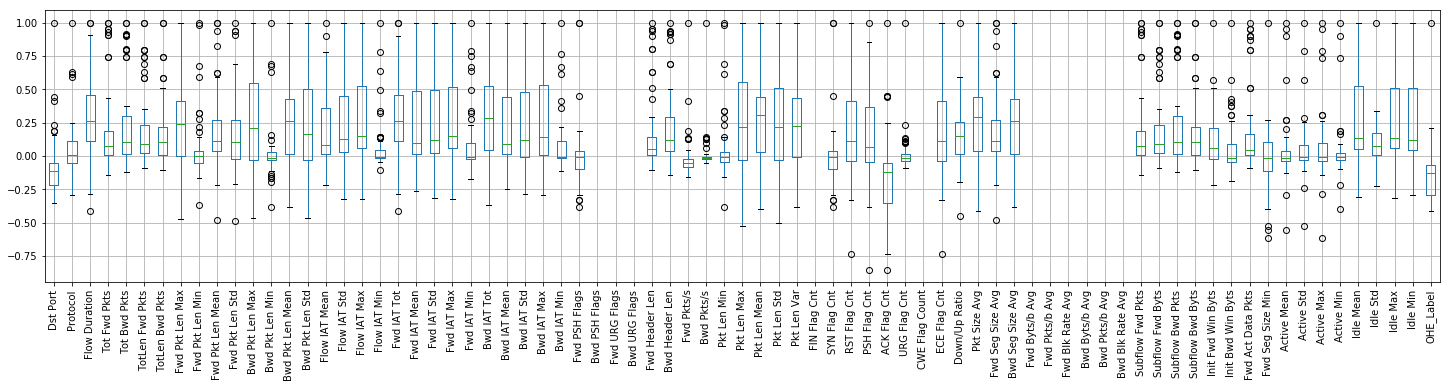

In [199]:
corre.boxplot(column=list(corre), figsize=(25, 5), rot=90)

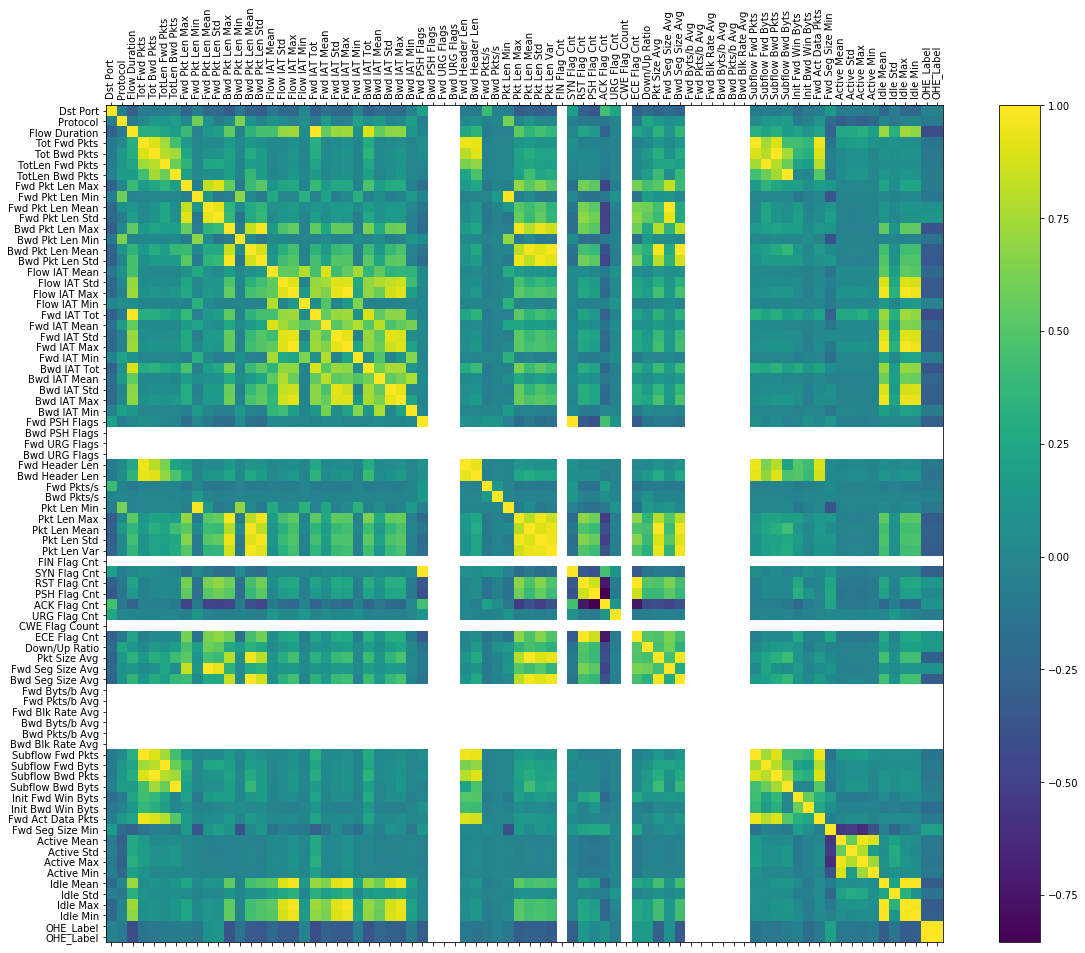

In [210]:
f = plt.figure(figsize=(20, 15))
plt.matshow(corre, fignum=f.number)
plt.xticks(range(corre.shape[1]), 
           corre.columns, 
           fontsize=10, 
           rotation=90)

plt.yticks(range(corre.shape[1]), 
           corre.columns, 
           fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

## 5. Note-worthy stuff...?

Places to get more data set
1. https://github.com/shramos/Awesome-Cybersecurity-Datasets
2. https://github.com/Hackinfinity/Cyber-Security-Dataset-collections
3. https://toolbox.google.com/datasetsearch

Datasets of interest (I didn't do...)
1. http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
2. https://github.com/marcoramilli/MalwareTrainingSets